In [1]:
import time
# from fuzzywuzzy import fuzz

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt
from konlpy.tag import Mecab
# from khaiii import KhaiiiApi
import numpy as np
from collections import Counter
import re
import networkx as nx

from wordcloud import WordCloud
from PIL import ImageFont, ImageDraw

import matplotlib.pyplot as plt

from matplotlib import font_manager

import warnings
warnings.simplefilter("ignore")

### - 데이터 불러오기

In [13]:
# 재해개요 Data Load
df = pd.read_excel("naver_blog_content.xlsx").drop('Unnamed: 0',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     17 non-null     object
 1   nickname  17 non-null     object
 2   datetime  17 non-null     object
 3   content   17 non-null     object
dtypes: object(4)
memory usage: 672.0+ bytes


### -부정적인 리뷰 및 리뷰 내용만 필터링

In [15]:

df = pd.DataFrame(df['content'])
df

,content
0,"매년 발표되는 ‘트렌드 코리아’의 2023년 키워드를 들어보셨다면, 유독 눈에 들어..."
1,"MZ세대 다음은 알파세대- 특징, MZ와의 차별점, 미래유망 산업 MZ세대는 밀레니..."
2,밀레니얼 세대와 Z세대를 합친 MZ세대가 많이 핫합니다. MZ세대가 나타난지 시간은...
3,"안녕하세요, 예금보험공사 SNS 기자단입니다. 2022년을 뜨겁게 달군 키워드가 있..."
4,밀레니얼 세대가 낳은 진정한 디지털 원주민 소비자가 등장하고 있습니다.\n1995년...
5,여러분~ 안녕하세요!\n해커스공무원 입니다.\n최근 젊은 세대를 가리키며 ‘MZ세대...
6,엠제트 또는 엠지 세대 (MZ세대)\n다음인\n알파세대(A세대)에 대한 내 생각이\...
7,● 알파세대 개념 및 특징을 알아보고 MZ 세대와의 차이를 이해하고 우리 사회가 해...
8,안녕하세요\n시대가 흐를수록\n한 세대를 표현하는\n용어가 달라지고 있는데요\n단순...
9,"세상이 정말 빠르게 변화한다. MZ세대가 세상을 점령(?)할 듯 하더니, 어느새 알..."


### - 불용어사전 정의 

In [16]:
# 불용어 정의
df_stopwords = pd.read_excel('stopwords.xlsx')
df_stopwords

,불용어
0,아
1,휴
2,아이구
3,아이쿠
4,아이고
...,...
1097,베
1098,켐
1099,공
1100,씨


### - 불용어 제거 및 형태소 분석

In [17]:
# 명사부분 추출
sentence_list = []  # 전체 리뷰에 포함된 형태소 리스트 
morphs_list = [] # 각 리뷰에 포함된 형태소 리스트 

# from eunjeon import Mecab
tagger = Mecab()
sentence_nouns_list = []
for post in df['content']:
    morphs_value = []
    for noun in tagger.nouns(post):
        if noun not in list(df_stopwords.get("불용어")):
            if len(noun) == 1:
                continue
            morphs_list.append(noun)

            morphs_value.append(noun)
    sentence_nouns_list.append(morphs_value)

In [18]:
# 가장많이 나오는 명사 상위 20개
from collections import Counter
num_top_nouns = 200
nouns_counter = Counter(morphs_list)
top_nouns = dict(nouns_counter.most_common(num_top_nouns)[:200])
top_nouns
# print(len(counted_nouns))

{'세대': 550,
 '알파': 210,
 '디지털': 66,
 '때문': 47,
 '소비': 41,
 '특징': 40,
 '부모': 37,
 '밀레': 35,
 '니얼': 35,
 '스마트폰': 30,
 '트렌드': 26,
 '생각': 25,
 '경제': 25,
 '세상': 24,
 '사회': 24,
 '기술': 23,
 '시대': 21,
 '경험': 20,
 '성장': 20,
 '금융': 20,
 '중요': 19,
 '학습': 18,
 '특성': 18,
 '사람': 18,
 '시장': 18,
 '영향': 18,
 '사용': 17,
 '환경': 16,
 '교육': 16,
 '친구': 15,
 '미래': 15,
 '변화': 15,
 '기업': 15,
 '초반': 15,
 '소통': 14,
 '정보': 14,
 '세계': 14,
 '메타': 14,
 '출생': 13,
 '이해': 13,
 '이후': 13,
 '온라인': 13,
 '개인': 13,
 '버스': 13,
 '인공지능': 13,
 '자녀': 13,
 '주목': 13,
 '문화': 13,
 '키워드': 12,
 '추구': 12,
 '공부': 12,
 '수업': 12,
 '투자': 12,
 '영어': 11,
 '중심': 11,
 '공간': 11,
 '활동': 11,
 '의미': 11,
 '생활': 11,
 '다이소': 11,
 '엑스틴': 11,
 '유튜브': 10,
 '과거': 10,
 '아날로그': 10,
 '엠지': 10,
 '원주민': 9,
 '코로나': 9,
 '시기': 9,
 '표현': 9,
 '최근': 9,
 '게임': 9,
 '소비자': 9,
 '스피커': 9,
 '중반': 9,
 '시절': 9,
 '영향력': 9,
 '위기': 9,
 '공유': 8,
 '고민': 8,
 '인구': 8,
 '저출산': 8,
 '지금': 8,
 '대부분': 8,
 '미국': 8,
 '학교': 8,
 '모바일': 8,
 '이야기': 8,
 '진보': 8,
 '마케팅': 8,
 '코리아': 7,
 '단어': 7,

In [19]:
sentence_list = []
for sentence in sentence_nouns_list:
    sentence_list.append(' '.join(sentence))
print(sentence_list)

['발표 트렌드 코리아 키워드 키워드 텐데요 알파 세대 알파 세대 출생 단어 세대 분류 만큼 기존 세대 특징 알파 세대 특징 분석 이해 영어 학습 방법 준비 편리 추구 디지털 원주민 이후 출생 알파 세대 디지털 경험 디지털 원주민 원주민 디지털 환경 온라인 학습 알파 세대 디지털 학습 교사 공부 선호 코로나 시기 온라인 강의 선생 친구 채팅 소통 이미지 영상 선호 크리에이터 디지털 기기 자유자재 문자 텍스트 이미지 영상 때문 내용 유튜브 검색창 키워드 입력 정보 표현 콘텐츠 틱톡 영상 플랫폼 공유 알파 세대 속도 자극 반응 집중력 특징 효율 추구 중심 세대 밀레 니얼 엄마 아빠 때문 세상 중요 전교 엄친아 영역 최고 여깁니다 때문 공부 스케줄 스케줄 스타일 맞춤 교육 서비스 추구 포스트 전직 초등 교사 알파 세대 디지털 역량 선생 실시간 온라인 수업 최근 교육부 공교육 현장 오프 융합 학습 공간 에듀 테크 학습 확대 지속 확대 이유 알파 세대 학습 동기 부여 흥미 지속 적극 학습 참여 도구 때문 윤선 베이직 화상 관리 시스템 영어 수업 진행 관리 교사 학부모 선택 때문 호감 긍정 학습 시작 온라인 수업 편안 공간 수업 때문 부담감 장점 문해력 영어 문해력 학습 알파 세대 디지털 역량 최고 반면 문해력 역량 걱정 부분 평소 학습 프로세스 문해력 향상 윤선 베이직 선생 영어 학습 활동 스마트 플리 활동 원어민 소리 소리 녹음 훈련 소리 훈련 반복 맥락 파악 영어 문해력 향상 주도 역량 성취감 유대감 일대일 수업 중심 알파 세대 필요 개개인 특성 맞춤 교육 필요 학습 제공 효능감 학습 주도 역량 때문 유대감 수업 중도 수업 강력 추천 윤선 베이직 수업 학습 결과 바탕 지도 수업 오프라인 수업 수업 퀄리티 제공 일주일 주도 학습 내용 바탕 온라인 선생 교재 문장 상황 적용 방법 텍스트 선생 발음 내용 완벽 알파 세대 특성 디지털 환경 개별 맞춤 학습 제공 윤선 베이직 영어 공부 시작 신규 가입자 다양 이벤트 진행 학습 할인 원서 세트 상당 가입 혜택 고민 윤선 베이직

In [31]:
[idx for idx,i in enumerate(sentence_list) if '창업' in i]

[4]

{'세대': 550, '알파': 210, '디지털': 66, '때문': 47, '소비': 41, '특징': 40, '부모': 37, '밀레': 35, '니얼': 35, '스마트폰': 30, '트렌드': 26, '생각': 25, '경제': 25, '세상': 24, '사회': 24, '기술': 23, '시대': 21, '경험': 20, '성장': 20, '금융': 20, '중요': 19, '학습': 18, '특성': 18, '사람': 18, '시장': 18, '영향': 18, '사용': 17, '환경': 16, '교육': 16, '친구': 15, '미래': 15, '변화': 15, '기업': 15, '초반': 15, '소통': 14, '정보': 14, '세계': 14, '메타': 14, '출생': 13, '이해': 13, '이후': 13, '온라인': 13, '개인': 13, '버스': 13, '인공지능': 13, '자녀': 13, '주목': 13, '문화': 13, '키워드': 12, '추구': 12, '공부': 12, '수업': 12, '투자': 12, '영어': 11, '중심': 11, '공간': 11, '활동': 11, '의미': 11, '생활': 11, '다이소': 11, '엑스틴': 11, '유튜브': 10, '과거': 10, '아날로그': 10, '엠지': 10, '원주민': 9, '코로나': 9, '시기': 9, '표현': 9, '최근': 9, '게임': 9, '소비자': 9, '스피커': 9, '중반': 9, '시절': 9, '영향력': 9, '위기': 9, '공유': 8, '고민': 8, '인구': 8, '저출산': 8, '지금': 8, '대부분': 8, '미국': 8, '학교': 8, '모바일': 8, '이야기': 8, '진보': 8, '마케팅': 8, '코리아': 7, '단어': 7, '선호': 7, '콘텐츠': 7, '결과': 7, '놀이터': 7, '인터넷': 7, '가상': 7, '자연': 7, '기성': 7, '사이': 7, '알렉사'

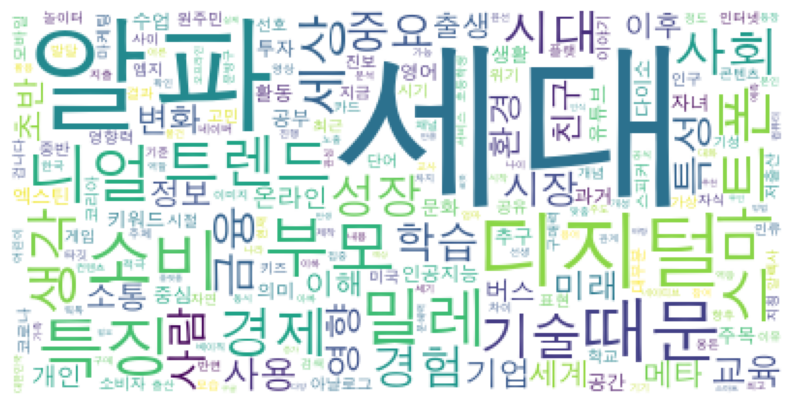

In [28]:
# wordcloud 패키지 다운로드
# !pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
nouns = []
######################################### 위에서 했던 불용어 제거 및 형태소 분석과 같은 내용 
for post in df['content']:
    for noun in tagger.nouns(post):
        if noun not in list(df_stopwords.get("불용어")):
            if len(noun) == 1:
                continue
            nouns.append(noun) 
######################################### 위에서 했던 불용어 제거 및 형태소 분석과 같은 내용        

num_top_nouns = 200  # 상위 200개 명사(keyword)에 대해서 워드클라우드를 할 것임 
nouns_counter = Counter(nouns)
top_nouns = dict(nouns_counter.most_common(num_top_nouns)[:200])
print(top_nouns)

# wc = WordCloud(background_color="white", font_path='NanumBarunGothic.ttf')
wc = WordCloud(background_color="white", font_path='AppleGothic.ttf')
wc.generate_from_frequencies(top_nouns)
# World
# 많이 나타나는 단어일수록 크게 나타남

figure = plt.figure()
figure.set_size_inches(10, 10)
ax = figure.add_subplot(1, 1, 1)
ax.axis("off")
ax.imshow(wc)
wc.to_file(filename="국민.png") # to_file 함수
tagger = Mecab()

# posts

In [29]:
def tokenizer_2(raw_texts, stop_words=list(df_stopwords.get("불용어"))):
    nouns = []
    for noun in tagger.nouns(raw_texts):
        if noun not in stop_words and len(noun)>1:
            nouns.append(noun)
    return nouns

In [27]:
tfidfv = TfidfVectorizer(
    tokenizer = tokenizer_2, # 문장에 대한 tokenizer (위에 정의한 함수 이용)
    min_df = 10,            # 단어가 출현하는 최소 문서의 개수
    sublinear_tf = True,    # tf값에 1+log(tf)를 적용하여 tf값이 무한정 커지는 것을 막음
    stop_words = list(df_stopwords.get("불용어"))
)
X = tfidfv.fit_transform(df['content'])
X_df = pd.DataFrame(X.toarray(), columns = tfidfv.get_feature_names())
X_df # TF-IDF DTM

,경험,니얼,디지털,때문,밀레,부모,사용,사회,생각,성장,세대,소비,스마트폰,알파,영향,특징
0,0.153445,0.183018,0.463548,0.478806,0.183018,0.000000,0.000000,0.000000,0.000000,0.000000,0.446247,0.000000,0.000000,0.416674,0.000000,0.304266
1,0.000000,0.157594,0.211380,0.412294,0.157594,0.000000,0.000000,0.000000,0.330729,0.251274,0.489694,0.139955,0.293711,0.358792,0.000000,0.297915
2,0.109993,0.275320,0.103928,0.197264,0.275320,0.259269,0.259269,0.275320,0.131191,0.123543,0.418518,0.278020,0.278020,0.351232,0.131191,0.271194
3,0.117158,0.411653,0.000000,0.260430,0.411653,0.367369,0.000000,0.000000,0.139737,0.131590,0.418116,0.210113,0.000000,0.347176,0.236595,0.110698
4,0.202134,0.338428,0.300559,0.000000,0.338428,0.333144,0.183170,0.241090,0.000000,0.108183,0.371676,0.284821,0.102022,0.348409,0.194510,0.190989
5,0.176821,0.297239,0.235469,0.000000,0.297239,0.000000,0.198604,0.210900,0.124561,0.306084,0.408267,0.232145,0.288652,0.309471,0.297239,0.235469
6,0.000000,0.000000,0.161705,0.380429,0.000000,0.403403,0.000000,0.000000,0.532649,0.000000,0.451690,0.000000,0.181276,0.381825,0.000000,0.000000
7,0.198217,0.000000,0.325862,0.209956,0.000000,0.222635,0.131492,0.293035,0.411345,0.000000,0.417804,0.124003,0.365303,0.333528,0.000000,0.232138
8,0.144112,0.360722,0.285760,0.000000,0.360722,0.274062,0.161865,0.171886,0.000000,0.161865,0.481180,0.000000,0.152647,0.300525,0.171886,0.324932
9,0.139904,0.282530,0.315444,0.310992,0.282530,0.157139,0.157139,0.282530,0.000000,0.157139,0.480298,0.000000,0.148189,0.266801,0.166867,0.344942


In [23]:
from sklearn.feature_extraction.text import CountVectorizer
countv = CountVectorizer(
                         min_df=5 # 최소 단어 등장 횟수
                        ,stop_words = list(df_stopwords.get("불용어"))
                        )
sp_mat = countv.fit_transform(sentence_list)


# 희소행렬을 np array로
count_df = pd.DataFrame(sp_mat.toarray(),columns = countv.get_feature_names())
count_df



,가상,개념,개인,게임,결과,경제,경험,고민,공간,공부,...,콘텐츠,키워드,키즈,투자,트렌드,특성,특징,학교,환경,활동
0,0,0,0,0,1,0,1,1,2,3,...,1,3,0,0,1,2,3,0,2,2
1,1,0,1,1,0,0,0,0,1,0,...,0,0,0,3,1,0,4,0,0,0
2,0,0,2,2,0,0,1,0,0,1,...,0,0,1,1,2,0,5,1,1,0
3,0,0,1,0,1,8,1,0,0,0,...,0,1,1,0,1,8,1,1,1,0
4,2,1,0,0,1,4,3,1,4,5,...,0,3,2,4,8,0,3,2,3,3
5,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,3,0,4,0,0,0
6,1,0,0,1,0,1,0,3,0,2,...,0,0,0,0,0,0,0,1,2,0
7,0,2,0,0,0,0,2,2,0,0,...,0,0,2,1,0,0,3,0,0,1
8,0,0,0,0,0,2,1,0,0,0,...,2,0,0,0,0,0,4,0,2,0
9,0,0,1,0,0,3,1,0,0,0,...,2,0,0,1,0,0,5,0,2,0


In [24]:
# count Vector 기반 동시 단어 행렬
count_df_transpose = count_df.transpose()
count_df_transpose # 전치 행렬
count_term_document_matrix = count_df_transpose.dot(count_df) # 행렬 * 전치행렬
count_term_document_matrix # 동시 단어 행렬

,가상,개념,개인,게임,결과,경제,경험,고민,공간,공부,...,콘텐츠,키워드,키즈,투자,트렌드,특성,특징,학교,환경,활동
가상,11,6,5,2,3,14,10,5,14,12,...,0,6,4,12,26,3,14,5,10,9
개념,6,11,2,2,1,6,12,5,9,6,...,2,5,7,6,15,4,16,4,4,7
개인,5,2,29,7,11,33,15,2,6,3,...,4,3,4,12,29,24,27,7,14,14
게임,2,2,7,19,0,3,10,3,1,6,...,2,9,4,5,11,5,19,7,4,2
결과,3,1,11,0,13,17,7,5,7,8,...,1,7,3,8,15,13,13,6,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
특성,3,4,24,5,13,83,25,2,10,7,...,6,23,9,3,28,88,22,10,21,17
특징,14,16,27,19,13,46,50,14,28,30,...,24,26,19,39,61,22,140,16,41,21
학교,5,4,7,7,6,19,10,6,8,15,...,2,7,8,10,25,10,16,12,10,8
환경,10,4,14,4,8,43,23,11,19,26,...,11,18,8,17,39,21,41,10,32,20
